In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ushape.csv", header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [3]:
df.columns

Index([0, 1, 2], dtype='int64')

In [4]:
df[0]

0     0.031595
1     2.115098
2     0.882490
3    -0.055144
4     0.829545
        ...   
95    1.699453
96    0.218623
97    0.952914
98   -1.318500
99   -1.296818
Name: 0, Length: 100, dtype: float64

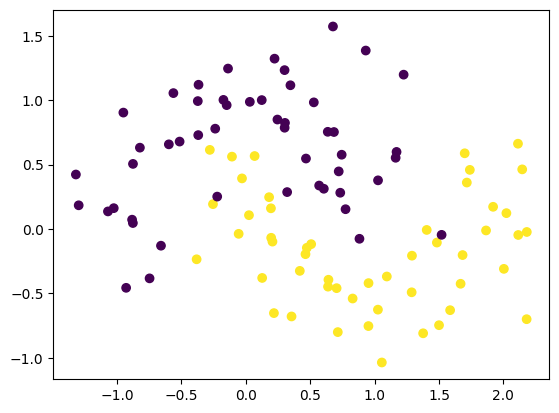

In [5]:
plt.scatter(df[0],df[1],c=df[2])

In [6]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Set parameters to 0
model.get_weights()

[array([[ 0.38428915, -1.0600266 ],
        [ 0.18093991, -1.189617  ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.5241213 ],
        [0.32312274]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0.5, 0.5],
        [0.5, 0.5]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.5078 - loss: 0.9114 - val_accuracy: 0.5000 - val_loss: 0.8204
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.9522 - val_accuracy: 0.5000 - val_loss: 0.8177
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4648 - loss: 0.9728 - val_accuracy: 0.5000 - val_loss: 0.8148
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5078 - loss: 0.9125 - val_accuracy: 0.5000 - val_loss: 0.8121
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5117 - loss: 0.9077 - val_accuracy: 0.5000 - val_loss: 0.8094
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4609 - loss: 0.9643 - val_accuracy: 0.5000 - val_loss: 0.8067
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5078 - loss: 0.8929 - val_accuracy: 0.5000 - val_loss: 0.8040
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4766 - loss: 0.9345 - val_accuracy: 0.5000 - val_loss

In [16]:
model.get_weights()

[array([[0.52769744, 0.52769744],
        [0.25393167, 0.25393167]], dtype=float32),
 array([0.3055321, 0.3055321], dtype=float32),
 array([[0.29097965],
        [0.29097965]], dtype=float32),
 array([0.25611395], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 485us/step


<Axes: >

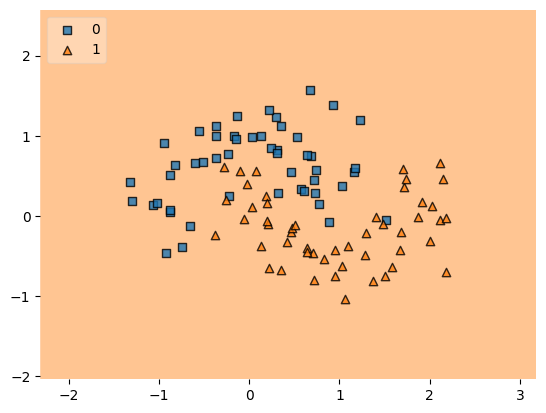

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
print("The End")

The End
